# Best Model
Julia Avila
Camilo Huertas

32 ReLU
16 Tanh

Model architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32_relu (Dense)           │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16_tanh (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_1 (Dense)          │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

Streaming output truncated to the last 5000 lines.
Epoch 1668/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4762e-05 - mean_absolute_error: 0.0031 - val_loss: 1.2863e-05 - val_mean_absolute_error: 0.0030
Epoch 1669/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4335e-05 - mean_absolute_error: 0.0031 - val_loss: 1.3551e-05 - val_mean_absolute_error: 0.0028
Epoch 1670/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7575e-05 - mean_absolute_error: 0.0033 - val_loss: 1.7427e-05 - val_mean_absolute_error: 0.0036
Epoch 1671/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7979e-05 - mean_absolute_error: 0.0035 - val_loss: 1.5639e-05 - val_mean_absolute_error: 0.0033
Epoch 1672/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9696e-05 - mean_absolute_error: 0.0037 - val_loss: 1.2377e-05 - val_mean_absolute_error: 0.0028
Epoch 1673/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2039e-05 - mean_absolute_error: 0.0027 - val_loss: 1.0317e-05 - val_mean

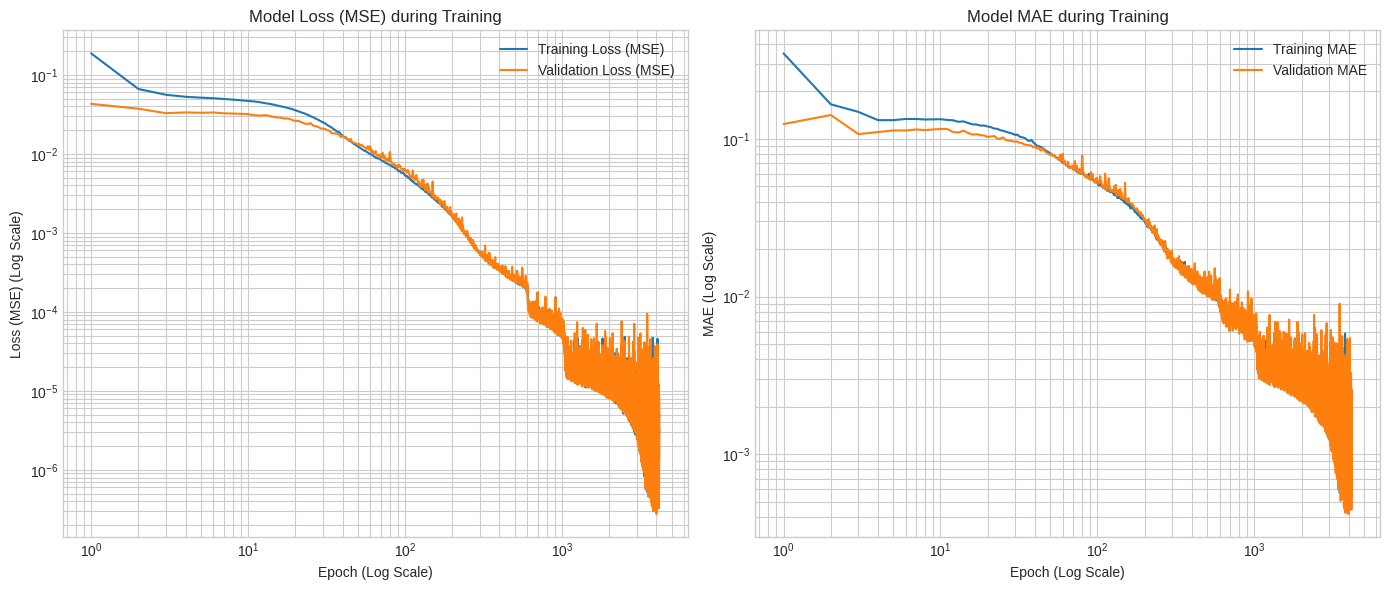


Visualizing predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


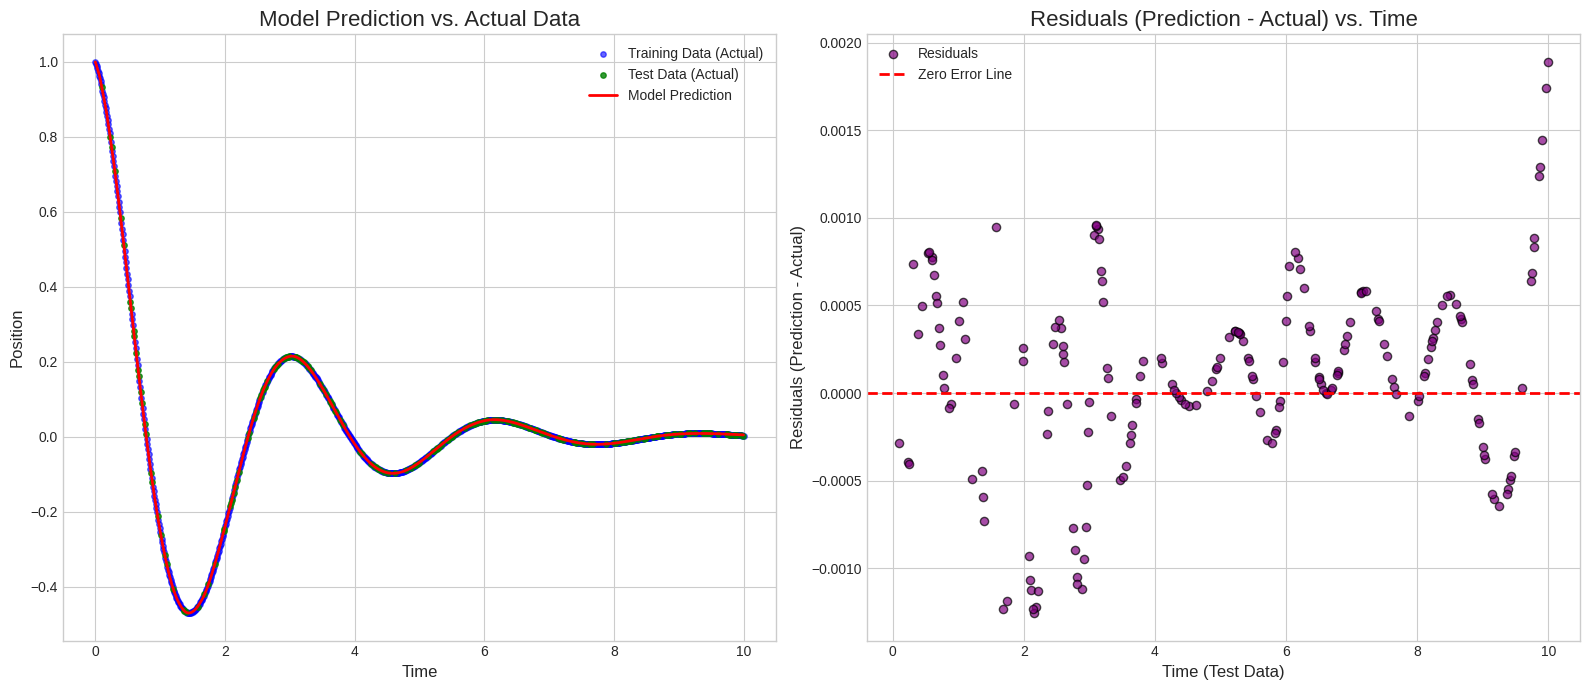


Script execution finished.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# --- 1. Prepare Data ---
def generate_damped_oscillator_data(num_samples=1000, noise_amplitude=0.00):
    """Generates synthetic data for a damped oscillator."""
    # With noise_amplitude = 0.00, the data is noise-free
    time_steps = np.linspace(0, 10, num_samples)
    positions = 1.0 * np.exp(-0.5 * time_steps) * np.cos(2.0 * time_steps) + \
                  noise_amplitude * np.random.randn(num_samples)
    return time_steps, positions

# Generate and split data
time_data, position_data = generate_damped_oscillator_data(num_samples=1000, noise_amplitude=0.00)
X = time_data.reshape(-1, 1)
y = position_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Create and Compile Model ---
def build_custom_model(input_shape=(1,)):
    """Creates the specified neural network."""
    model = tf.keras.Sequential([
        # NEW: First Dense layer with 32 neurons and ReLU activation
        layers.Dense(32, activation='relu', input_shape=input_shape, name='dense_32_relu'),
        # NEW: Second Dense layer with 16 neurons and Tanh activation
        layers.Dense(16, activation='tanh', name='dense_16_tanh'),
        # Output layer with one neuron (for regression)
        layers.Dense(1, name='output_dense_1')
    ])

    # Optimizer: Adam
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Standard learning rate

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',      # MSE as the main loss function
                  metrics=['mean_absolute_error']) # MAE as an additional metric to track the target
    return model

model = build_custom_model()
print("Model architecture:")
model.summary()

# --- 3. Train Model ---
# EarlyStopping callback:
# - monitor='val_mean_absolute_error'
# - patience: Number of epochs with no significant improvement before training is stopped.
# - restore_best_weights: Ensures that we get the weights of the model with the best validation MAE.
# - min_delta: The minimum change that counts as an improvement. Important for very small error targets.
early_stopping_callback = EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=200, # Increased patience to give the model more time for fine-tuning
    restore_best_weights=True,
    min_delta=1e-6 # A very small improvement is still considered progress (0.000001)
)

# Training:
# - epochs: Maximum number of training runs.
# - batch_size: Number of training examples per update step.
# - validation_data: Data on which the loss and metrics are evaluated after each epoch.
print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    epochs=10000,
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[early_stopping_callback],
    verbose=1 # Shows progress during training
)

# --- 4. Evaluate Model ---
print("\nModel evaluation on the test set:")
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"  - Mean Squared Error (MSE): {loss:.8f}") # More precision for small errors
print(f"  - Mean Absolute Error (MAE): {mae:.8f}")   # More precision for small errors

# --- 5. Visualize Training History (Log-Log Plots) ---
if history and history.history: # Ensure that training has taken place
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 6))
    epochs_range = range(1, len(history.history['loss']) + 1)

    # Plot for training and validation loss (MSE)
    ax1 = plt.subplot(1, 2, 1)
    ax1.loglog(epochs_range, history.history['loss'], label='Training Loss (MSE)')
    ax1.loglog(epochs_range, history.history['val_loss'], label='Validation Loss (MSE)')
    ax1.set_title('Model Loss (MSE) during Training')
    ax1.set_xlabel('Epoch (Log Scale)')
    ax1.set_ylabel('Loss (MSE) (Log Scale)')
    ax1.legend()
    ax1.grid(True, which="both", ls="-")

    # Plot for training and validation MAE
    ax2 = plt.subplot(1, 2, 2)
    ax2.loglog(epochs_range, history.history['mean_absolute_error'], label='Training MAE')
    ax2.loglog(epochs_range, history.history['val_mean_absolute_error'], label='Validation MAE')
    ax2.set_title('Model MAE during Training')
    ax2.set_xlabel('Epoch (Log Scale)')
    ax2.set_ylabel('MAE (Log Scale)')
    ax2.legend()
    ax2.grid(True, which="both", ls="-")

    plt.tight_layout()
    plt.show()
else:
    print("\nNo training history available for plotting.")

# --- 6. Visualize Predictions ---
print("\nVisualizing predictions...")
y_pred_full = model.predict(X)
y_pred_test = model.predict(X_test)

fig, (ax1_viz, ax2_viz) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Prediction over the entire data
ax1_viz.scatter(X_train, y_train, label='Training Data (Actual)', alpha=0.6, s=15, color='blue')
ax1_viz.scatter(X_test, y_test, label='Test Data (Actual)', alpha=0.8, s=15, color='green')
ax1_viz.plot(time_data, y_pred_full, color='red', linewidth=2, label='Model Prediction')
ax1_viz.set_title('Model Prediction vs. Actual Data', fontsize=16)
ax1_viz.set_xlabel('Time', fontsize=12)
ax1_viz.set_ylabel('Position', fontsize=12)
ax1_viz.legend(fontsize=10)
ax1_viz.grid(True)

# Plot 2: Residuals (y_predicted - y_actual) vs. Time
residuals = y_pred_test.flatten() - y_test
time_test_flat = X_test.flatten()

ax2_viz.scatter(time_test_flat, residuals, alpha=0.7, color='purple', edgecolors='k', s=35, label='Residuals')
ax2_viz.axhline(0, color='red', linestyle='--', lw=2, label='Zero Error Line')
ax2_viz.set_title('Residuals (Prediction - Actual) vs. Time', fontsize=16)
ax2_viz.set_xlabel('Time (Test Data)', fontsize=12)
ax2_viz.set_ylabel('Residuals (Prediction - Actual)', fontsize=12)
ax2_viz.legend(fontsize=10)
ax2_viz.grid(True)

plt.tight_layout()
plt.show()

print("\nScript execution finished.")